<a href="https://colab.research.google.com/github/Mayakshanesht/Autonomous_Driving_Lecture_resources/blob/Perception/Facial_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
data=np.load("ORL_faces.npz")
data.files
  

['testY', 'testX', 'trainX', 'trainY']

In [ ]:
train_examples = data['testX']
train_labels = data['testY']
test_examples = data['trainX']
test_labels = data['trainY']


In [ ]:
#train_labels.shape
train_examples.shape
train_examples_reshaped=train_examples.reshape(160,112,92)
train_examples_normalized=np.array(train_examples_reshaped/255)
train_examples_reshaped1=np.expand_dims(train_examples_normalized,axis=0)
train_examples_normalized1=train_examples_reshaped1.reshape(160,112,92,1)



In [ ]:
train_examples_normalized1.shape

(160, 112, 92, 1)

In [ ]:
train_labels

array([ 0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  4,  4,
        4,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,
        6,  6,  6,  6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,
        8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
       10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 12,
       12, 12, 13, 13, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14,
       14, 15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18, 18, 19,
       19, 19, 19, 19, 19, 19, 19], dtype=uint8)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer=LabelBinarizer()
train_labels_hotcode=label_binarizer.fit_transform(train_labels)

In [ ]:
test_labels_hotcode=label_binarizer.fit_transform(test_labels)

In [ ]:
train_labels_hotcode.shape

(160, 20)

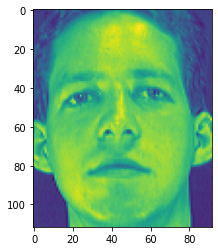

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_examples_normalized[0])

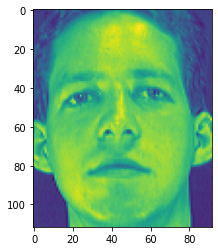

In [ ]:
plt.imshow(train_examples_reshaped[0])

In [ ]:
#Architect your CNN Model

model = tf.keras.models.Sequential()

#Step1: Create  First Convolution Layer
# Conv1D --- Sound/Mp3/Text
# Conv2D --- Image/Image Set
# Conv3D --- Movies/Mp4

#Create Convolve Layer
# Conv2D(No_Of_filters,Size_of_Filter, input_shape)
# Suggestions/Best Practices by Prashant Nair
# 1. Filters ----> Choose Boolean Algebra Compatible Values like 1,2,4,8,16,32,64,128,256,512
# 2. Size_of_Filter ---> If Data Size below 10GB --> (3,3) If betn 10GB - 100G --> (4,4) , Above 100G --> (5,5)
# 3. Input Shape ---> Suggested go 64,64 ; 128,128 ; 256,256 ; 512,512

model.add(tf.keras.layers.Conv2D(128, (3,3) , input_shape=(112,92,1) ,use_bias=False, padding='same', strides=(1,1)))
#model.add(layers.Conv2D(64, (3, 3), use_bias=False))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(tf.keras.layers.Dropout(0.2))
#model.add(tf.keras.layers.AveragePooling2D(pool_size=(2,2)))

#Step2: Create  Second Convolution Layer

model.add(tf.keras.layers.Conv2D(64, (3,3) , input_shape=(112,92,1) ,use_bias=False, padding='same', strides=(1,1)))
#model.add(layers.Conv2D(64, (3, 3), use_bias=False))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(tf.keras.layers.Conv2D(64, (3,3) , input_shape=(128,128,3) ,activation='relu', padding='same', strides=(1,1)))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(tf.keras.layers.Dropout(0.2))

#Step2: Create  Third Convolution Layer

model.add(tf.keras.layers.Conv2D(32, (3,3) , input_shape=(112,92,1) ,use_bias=False, padding='same', strides=(1,1)))
#model.add(layers.Conv2D(64, (3, 3), use_bias=False))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(tf.keras.layers.Conv2D(32, (3,3) , input_shape=(128,128,3) ,activation='relu', padding='same', strides=(1,1)))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(tf.keras.layers.Dropout(0.2))

#Step2: Create fourth Convolution Layer
model.add(tf.keras.layers.Conv2D(16, (3,3) , input_shape=(112,92,1) ,use_bias=False, padding='same', strides=(1,1)))
#model.add(layers.Conv2D(64, (3, 3), use_bias=False))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Activation("relu"))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(tf.keras.layers.Conv2D(16, (3,3) , input_shape=(128,128,3) ,activation='relu', padding='same', strides=(1,1)))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
#model.add(tf.keras.layers.Dropout(0.2))
#Step3: Flatten
model.add(tf.keras.layers.Flatten())

#Step4: FC Layer/ANN
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units=16, activation='relu'))
model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(units=20, activation='softmax'))

In [ ]:
#train_labels.shape
test_examples.shape
test_examples_reshaped=test_examples.reshape(240,112,92)
test_examples_normalized=np.array(test_examples_reshaped/255)
test_examples_reshaped1=np.expand_dims(test_examples_normalized,axis=0)
test_examples_normalized1=test_examples_reshaped1.reshape(240,112,92,1)

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_35 (Conv2D)           (None, 112, 92, 128)      1152      
_________________________________________________________________
batch_normalization_32 (Batc (None, 112, 92, 128)      512       
_________________________________________________________________
activation_32 (Activation)   (None, 112, 92, 128)      0         
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 56, 46, 128)       0         
_________________________________________________________________
conv2d_36 (Conv2D)           (None, 56, 46, 64)        73728     
_________________________________________________________________
batch_normalization_33 (Batc (None, 56, 46, 64)        256       
_________________________________________________________________
activation_33 (Activation)   (None, 56, 46, 64)      

In [ ]:
#Compile

model.compile(optimizer='adam',
            
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Fit
history = model.fit(x=train_examples_normalized1,
                    y=train_labels_hotcode,
                    validation_data=(test_examples_normalized1,test_labels_hotcode),
                    epochs = 100 )

Epoch 1/100
5/5 [==============================] - 14s 3s/step - loss: 0.2134 - accuracy: 0.9349 - val_loss: 7.7415 - val_accuracy: 0.1833
Epoch 2/100
5/5 [==============================] - 12s 3s/step - loss: 0.2809 - accuracy: 0.9031 - val_loss: 5.1211 - val_accuracy: 0.2417
Epoch 3/100
5/5 [==============================] - 13s 3s/step - loss: 0.4640 - accuracy: 0.8531 - val_loss: 4.7127 - val_accuracy: 0.2208
Epoch 4/100
5/5 [==============================] - 13s 3s/step - loss: 0.2610 - accuracy: 0.9194 - val_loss: 3.0020 - val_accuracy: 0.3833
Epoch 5/100
5/5 [==============================] - 13s 3s/step - loss: 0.2112 - accuracy: 0.9204 - val_loss: 2.4861 - val_accuracy: 0.4917
Epoch 6/100
5/5 [==============================] - 13s 3s/step - loss: 0.2079 - accuracy: 0.9145 - val_loss: 2.7413 - val_accuracy: 0.4458
Epoch 7/100
5/5 [==============================] - 13s 3s/step - loss: 0.2612 - accuracy: 0.8965 - val_loss: 2.8570 - val_accuracy: 0.4042
Epoch 8/100
5/5 [==========

8/8 - 3s - loss: 0.4804 - accuracy: 0.8750


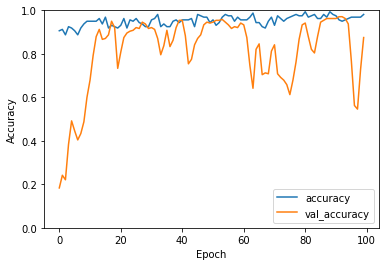

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_examples_normalized1,test_labels_hotcode, verbose=2)

In [ ]:
print(test_acc)

0.875


In [ ]:
model.save('/content/sample_data/my_model1.h5')

In [ ]:
img=tf.keras.preprocessing.image.img_to_array(train_examples_normalized1[0])

In [ ]:
imgexpanded=np.expand_dims(img,axis=0)

In [ ]:
model.predict_classes(imgexpanded)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0])

In [ ]:
if (model.predict_classes(imgexpanded))==0:
  print("it's working")
else:
  print("it's not")

it's working


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
